<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error, r2_score
from scipy import stats



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [34]:
# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

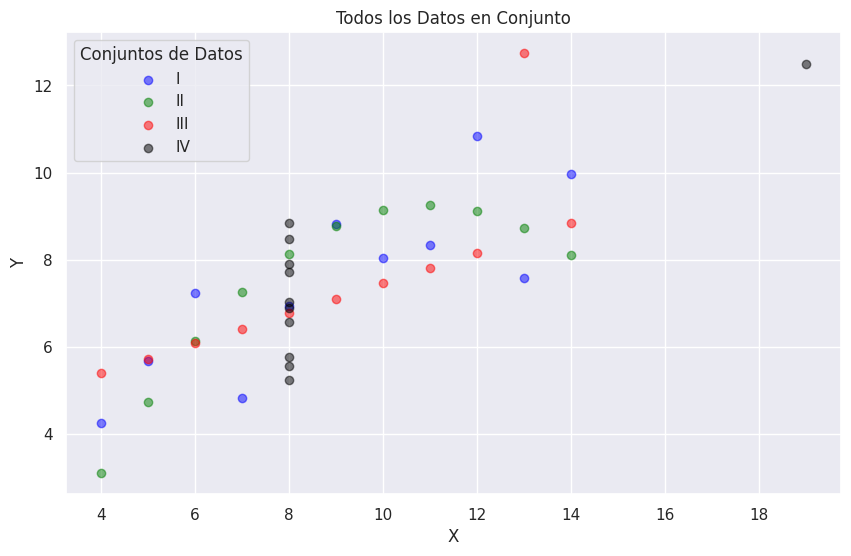

In [61]:
color_map = dict(zip(data["dataset"].unique(),
                     ["blue", "green", "red", "black"]))

plt.figure(figsize=(10, 6))

for Datos, group in data.groupby("dataset"):
    plt.scatter(group["x"],
                group["y"],
                color=color_map[Datos],
                alpha=0.5,
                edgecolor=None,
                label=Datos,
               )

plt.legend(frameon=True, title="Conjuntos de Datos")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Todos los Datos en Conjunto")
plt.show()

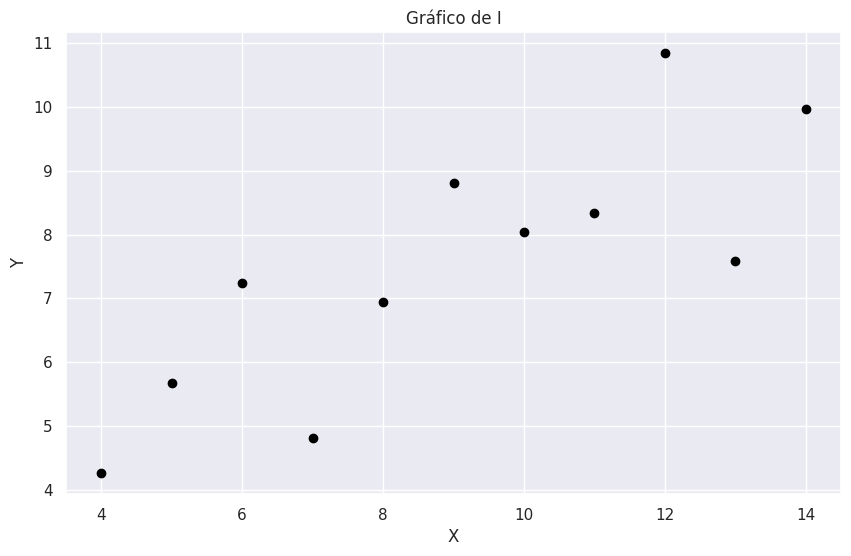

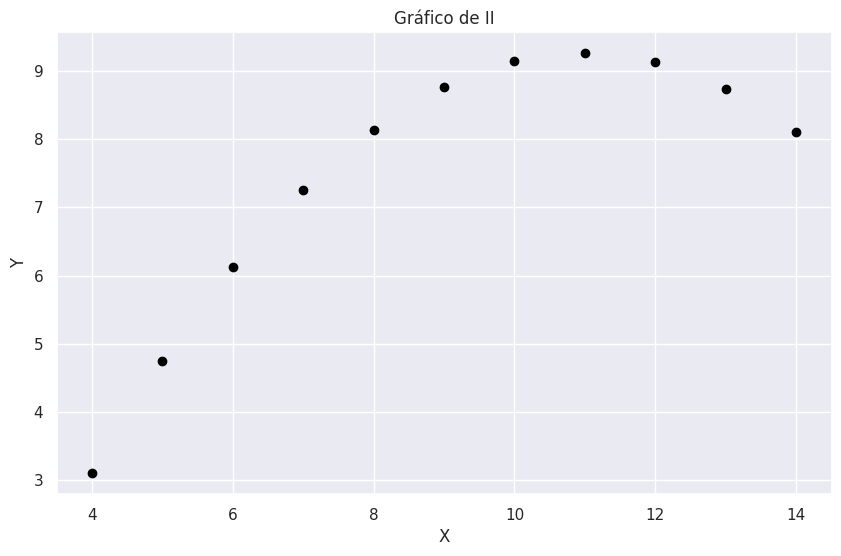

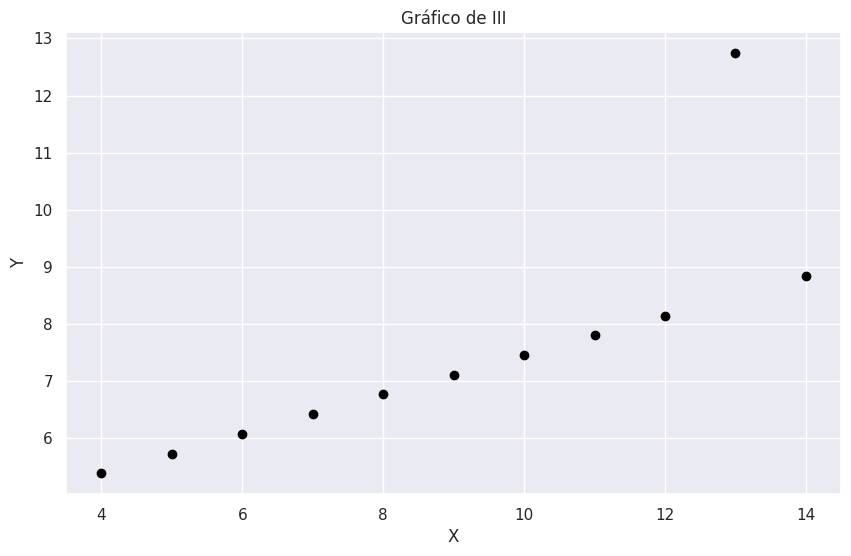

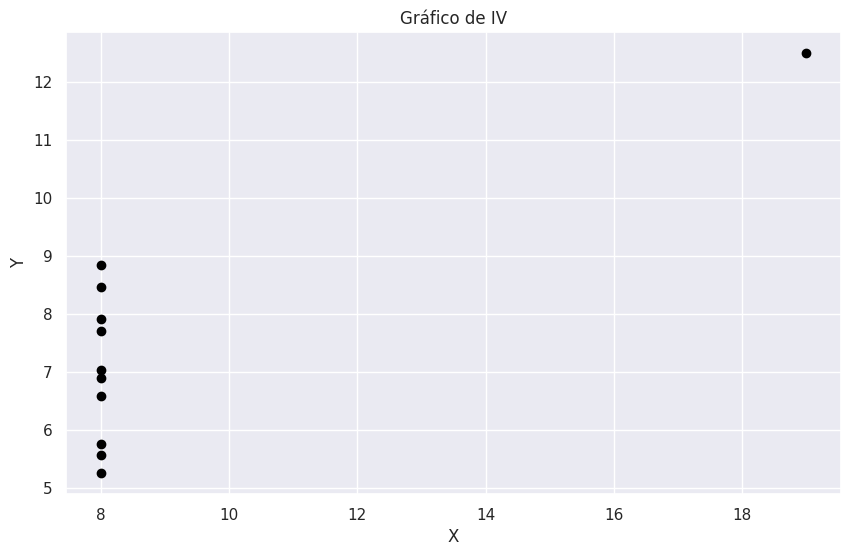

In [60]:
for Datos, group in data.groupby("dataset"):
    plt.figure(figsize=(10, 6))
    plt.scatter(group["x"],
                group["y"],
                color = "black",
                edgecolor="black",
                label=Datos,
               )

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Gráfico de {Datos}")
    plt.show()

**RESPUESTA:** Los conjuntos de datos tienen distribuciones totalmente distintas, como se ve en el gráfico hay puntos que están más dispersoso que otros o que tienen tendencias diferentes, los azules están bastante "desordenados", los verdes tienden a una curva, los rojos a una recta y los negros a una recta totalmente vertical.

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [9]:
for Datos, group in data.groupby("dataset"):
  print(f'\n Conjunto de Datos {Datos}')
  print(group.describe())


 Conjunto de Datos I
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000

 Conjunto de Datos II
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

 Conjunto de Datos III
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000

 Conjunto de Datos IV
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.00

**RESPUESTA:** Basandonos simplemente por las medidas estadisticas del comando describe, se podría intuir que los conjuntos de datos son "iguales" o más bien "muy parecidos", pues las medidas anteriormente dichas son casi iguales en la mayoría de los casos, cosa que contrasta notoriamente al ver cada uno de los gráficos como en el punto 1.

3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

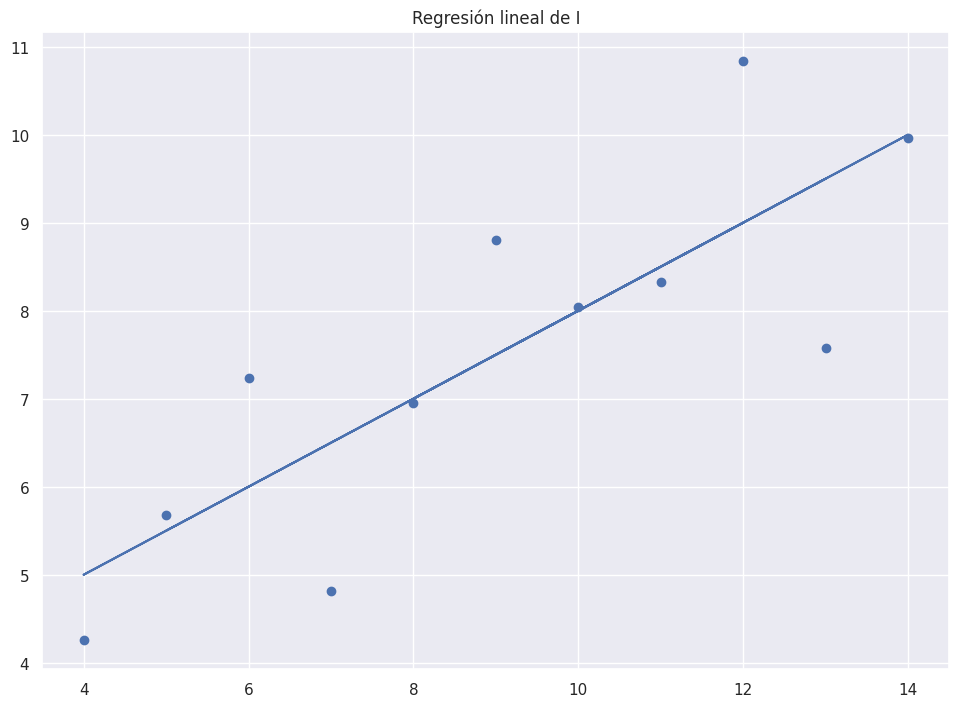


Metricas correspondientes a la Regresión lineal de I:
      mae     mse    rmse     mape   smape      r2
0  0.8374  1.2512  1.1185  12.1258  0.2163  0.6665


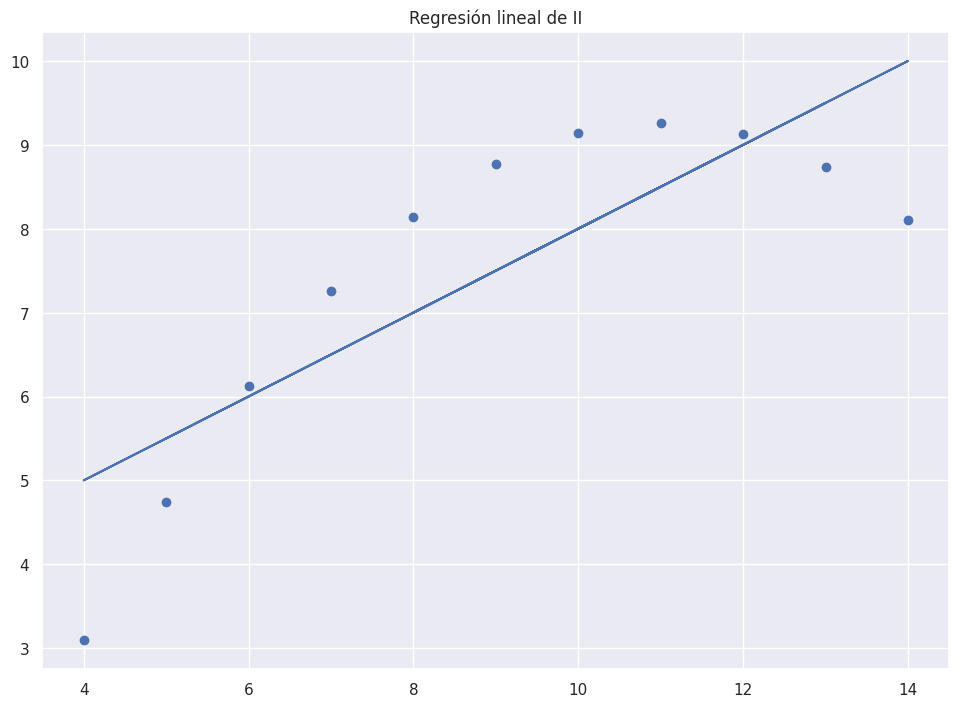


Metricas correspondientes a la Regresión lineal de II:
      mae     mse    rmse     mape   smape      r2
0  0.9679  1.2524  1.1191  15.6952  0.2713  0.6662


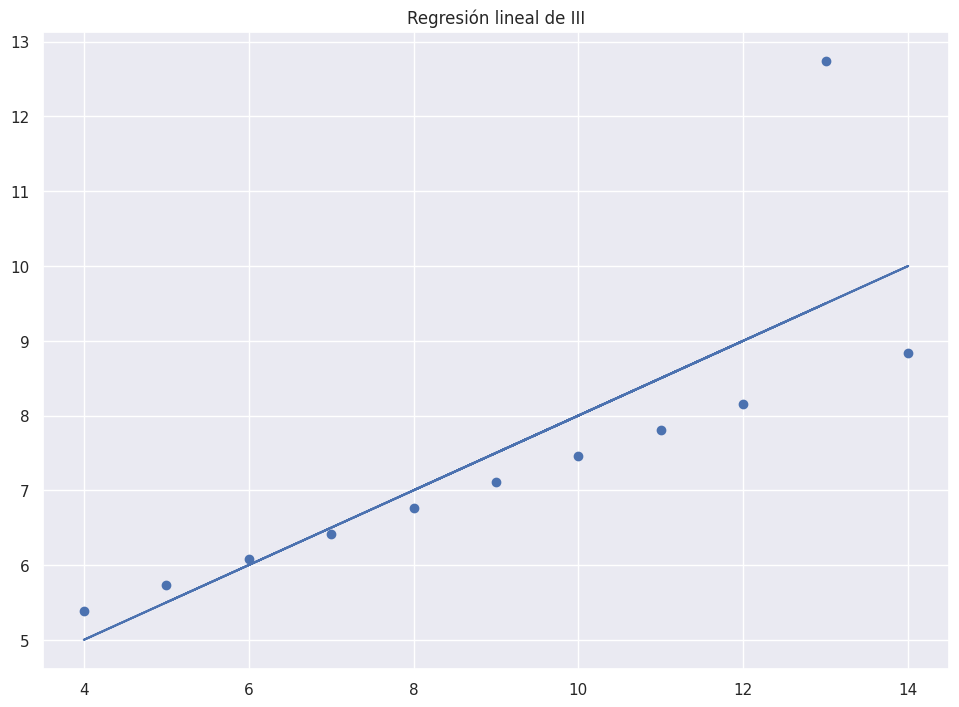


Metricas correspondientes a la Regresión lineal de III:
     mae     mse    rmse    mape   smape      r2
0  0.716  1.2506  1.1183  7.9707  0.1476  0.6663


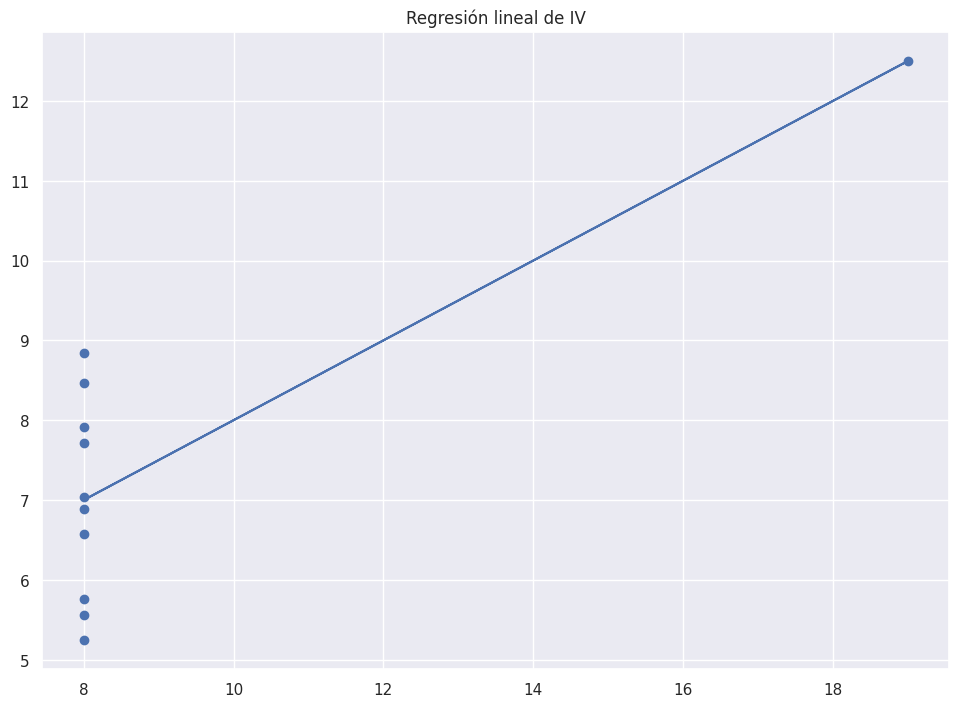


Metricas correspondientes a la Regresión lineal de IV:
      mae     mse    rmse     mape   smape      r2
0  0.9027  1.2493  1.1177  13.4738  0.2375  0.6667


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result


for Datos, group in data.groupby("dataset"):
    #Usamos un reajuste de regresión lineal
    x1= group[["x"]]
    y1= group["y"]

    regr = LinearRegression().fit(x1, y1)
    y_pred = regr.predict(x1)

    plt.scatter(group['x'], y1) #ploteamos los puntos
    plt.plot(group['x'], y_pred) #ploteamos la regresión
    plt.title(f'Regresión lineal de {Datos}')
    plt.show()

    #Recopilacion de Métricas
    df_temp = pd.DataFrame(
    {
        'y':y1,
        'yhat': regr.predict(x1)
        }
    )

    df_metrics = regression_metrics(df_temp)
    df_metrics['r2'] =  round(r2_score(y1, regr.predict(x1)),4)

    print(f'\nMetricas correspondientes a la Regresión lineal de {Datos}:')
    print(df_metrics)

**RESPUESTA:** Basandonos en estas nuevas métricas notamos que los conjuntos de datos son efectivamente diferente suponiendo que no hubiesemos visto cada uno de sus respectivos gráficos. Por otro lado se puede observar que las regresiones lineales son "parecidas" pero que no están bien ajustadas a cada uno de los conjuntos de datos.

4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

**RESPUESTA:** Para el conjunto de datos I no es posible hacer más, pues sus datos se escuntran a simple vista bien distribuidos y la regresión lineal cumple bastante bien. Para el conjunto de datos II notamos que es necesario hacer un ajuste polinomial, pues sus datos representan mucho mejor una curva que una ecuación de una recta. Para los conjuntos de Datos III y IV es necesario eliminar unos puntos que se escapan mucho del rango (Ver graficas de III y IV), y ya con eso podemos concluir que para el set de datos III se acomoda perfectamente con una regresión lineal y el conjunto de datos IV se ajusta a una linea vertical.

**NOTA:** No supe como hacer la regresión polinomial :(

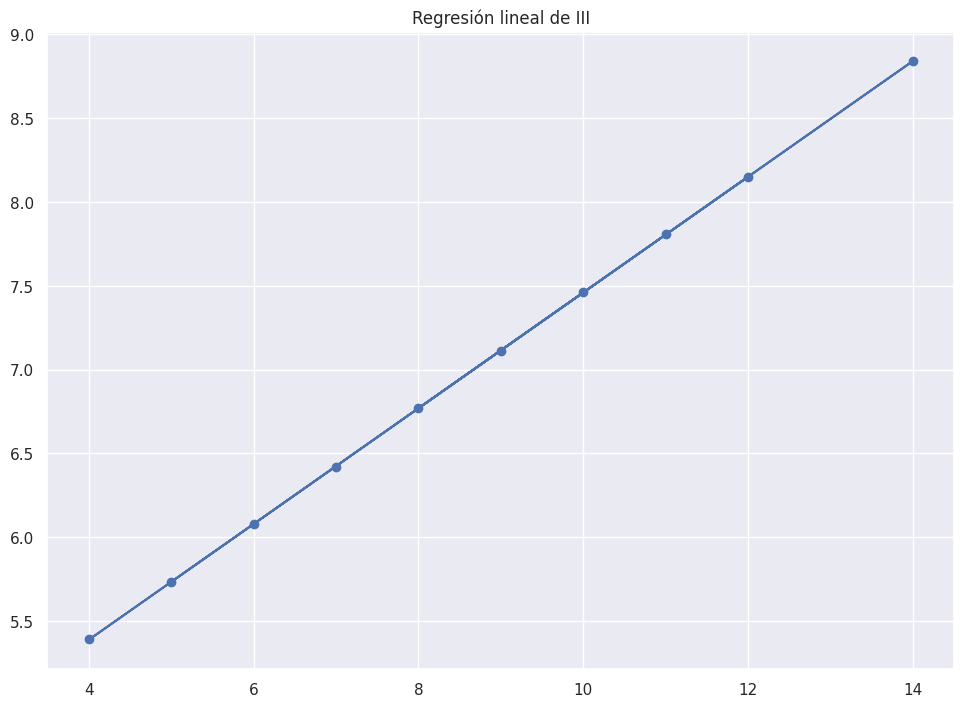


Metricas correspondientes a la Regresión lineal de III:
      mae  mse    rmse    mape   smape   r2
0  0.0023  0.0  0.0028  0.0347  0.0007  1.0


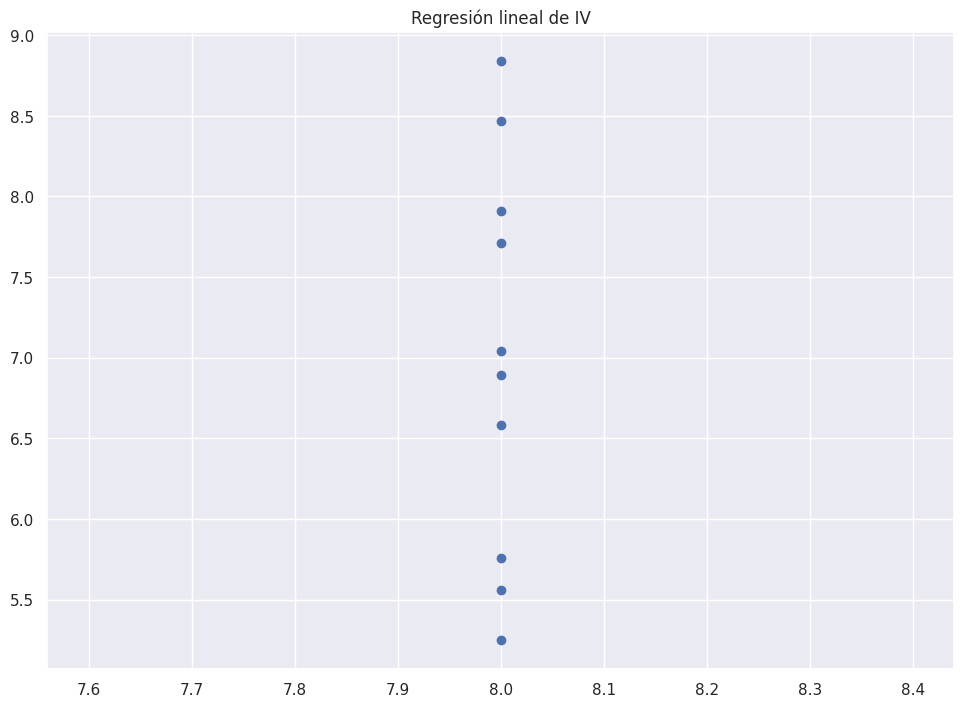


Metricas correspondientes a la Regresión lineal de IV:
     mae     mse    rmse     mape   smape   r2
0  0.993  1.3742  1.1723  14.8212  0.2582  0.0


In [93]:
newdata = data.drop([24, 40], axis = 0) #Elminamos los puntos conflictivos previamente localizados

for Datos, group in newdata.groupby("dataset"):
    if Datos == "III" or Datos == "IV":
        x1= group[["x"]]
        y1= group["y"]

        regr = LinearRegression().fit(x1, y1)
        y_pred = regr.predict(x1)

        plt.scatter(group['x'], y1) #ploteamos los puntos
        plt.plot(group['x'], y_pred) #ploteamos la regresión
        plt.title(f'Regresión lineal de {Datos}')
        plt.show()

        #Recopilacion de Métricas
        df_temp = pd.DataFrame(
        {
            'y':y1,
            'yhat': regr.predict(x1)
            }
        )

        df_metrics = regression_metrics(df_temp)
        df_metrics['r2'] =  round(r2_score(y1, regr.predict(x1)),4)

        print(f'\nMetricas correspondientes a la Regresión lineal de {Datos}:')
        print(df_metrics)